In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import sklearn

import numpy as np

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
features = df.iloc[:, :-1]
predictions = df.iloc[:, -1]

In [6]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True)

In [11]:
Train_data = pd.concat([X_train, y_train], axis = 'columns')
Train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,-1.506521,1.249201,-1.567576,-1.315444,0
15,-0.173674,3.090775,-1.283389,-1.052180,0
65,1.038005,0.098217,0.364896,0.264142,1
11,-1.264185,0.788808,-1.226552,-1.315444,0
42,-1.748856,0.328414,-1.397064,-1.315444,0


In [12]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,-0.041399,0.998187,-1.870024,-0.900681,-0.113090,0.674501,2.249683
sepal width (cm),120.0,0.009975,1.033867,-2.433947,-0.592373,-0.131979,0.788808,3.090775
petal length (cm),120.0,-0.017809,0.995988,-1.567576,-1.283389,0.279640,0.762758,1.672157
petal width (cm),120.0,-0.021061,0.990254,-1.447076,-1.183812,0.132510,0.790671,1.712096
target,120.0,0.991667,0.814736,0.000000,0.000000,1.000000,2.000000,2.000000


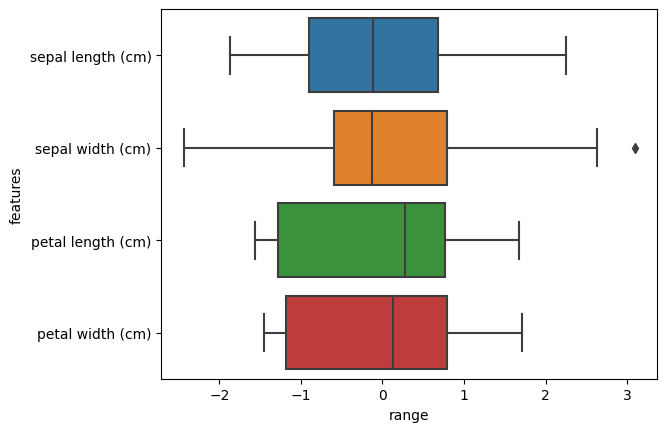

In [13]:
import seaborn as sns

sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

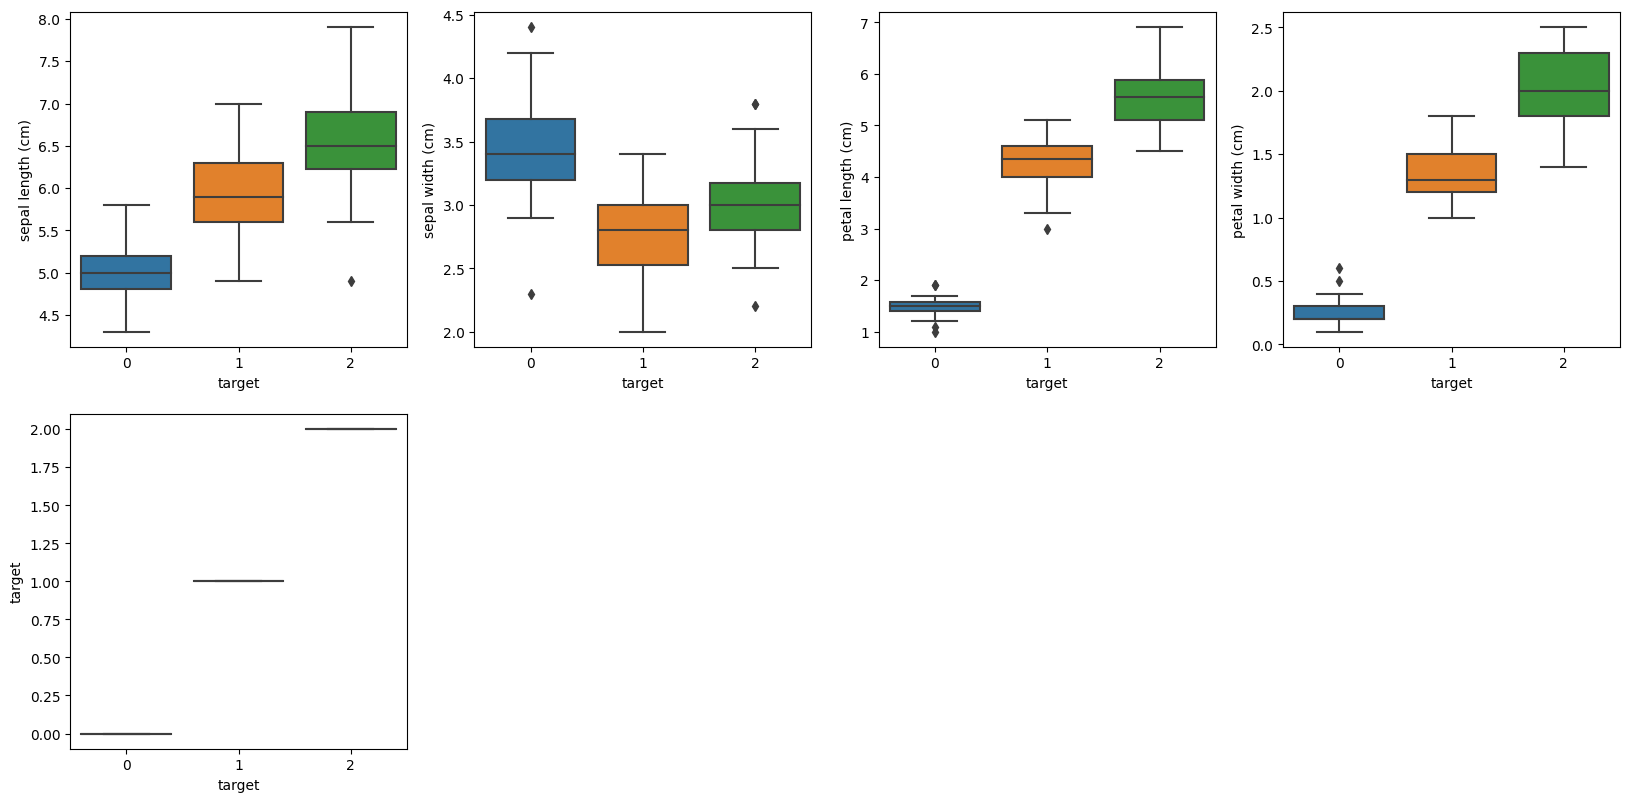

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
for i,ax in enumerate(axes.flat):
    if i<5:
        sns.boxplot(data=df, x='target', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [17]:
classes, count = np.unique(y_train, return_counts=True)
count

array([40, 41, 39], dtype=int64)

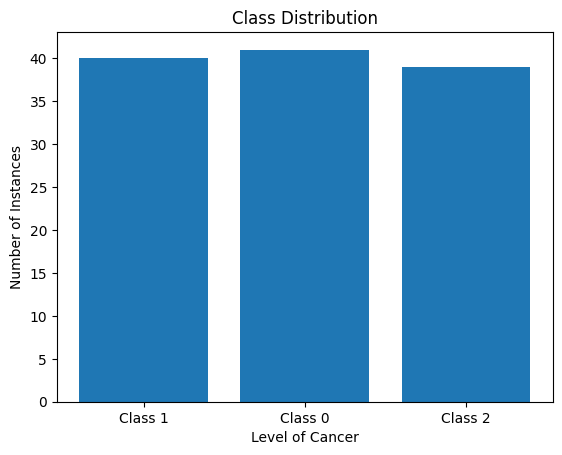

In [18]:
plt.bar(['Class 1', 'Class 0', 'Class 2'], count)
plt.title('Class Distribution')
plt.xlabel('Level of Cancer')
plt.ylabel('Number of Instances')
plt.show()

In [19]:
corr_mat = Train_data.corr(method='pearson')
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.106926,0.862175,0.801480,0.763847
sepal width (cm),-0.106926,1.000000,-0.432089,-0.369509,-0.444109
petal length (cm),0.862175,-0.432089,1.000000,0.962577,0.947794
petal width (cm),0.801480,-0.369509,0.962577,1.000000,0.951276
target,0.763847,-0.444109,0.947794,0.951276,1.000000


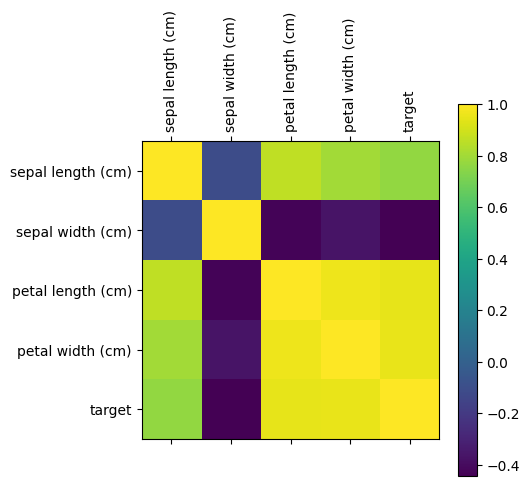

In [20]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

base_classifier = KNeighborsClassifier(n_neighbors=9)

model = BaggingClassifier(base_classifier, n_estimators=12, oob_score=True, random_state=42)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

oob_error = 1 - model.oob_score_
print("OOB Error:", oob_error)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.958
Train confusion matrix: 
 [[40  0  0]
 [ 0 39  2]
 [ 0  3 36]]
OOB Error: 0.04166666666666663
Test Accuracy:  1.0
Test confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.967
Train confusion matrix: 
 [[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
Test Accuracy:  1.0
Test confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
